245


Text(0.5,1,'Roll')

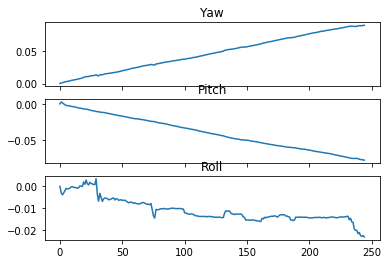

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

with open('log.txt', 'r') as f:
    quats = [line.split('Quaternion')[1].strip() for line in f.readlines() if len(line.split('Quaternion')) > 1]

yaws = []
pitches = []
rolls = []
for qs in quats:
    q = qs.split(',')
    q[0] = q[0][1:]
    q[-1] = q[-1][:-1]
    q = list(map(float, q))
    yaws.append(np.arctan2(2.0 * (q[2]  *  q[3] + q[0] * q[1]), q[0] * q[0] - q[1] * q[1] - q[2] * q[2] + q[3] * q[3]))
    pitches.append(-2.0 * (q[1] * q[3] - q[0] * q[2]))
    rolls.append(np.arctan2(2.0 * (q[1] * q[2] + q[0] * q[3]), q[0] * q[0] + q[1] * q[1] - q[2] * q[2] - q[3] * q[3]))

print(len(yaws))

f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(np.degrees(yaws))
axarr[0].set_title('Yaw')
axarr[1].plot(np.degrees(pitches))
axarr[1].set_title('Pitch')
axarr[2].plot(np.degrees(rolls))
axarr[2].set_title('Roll')